# One Million Headlines
This project intends to find out what was the main subject discussed in Australia News Media in the Last 20 Years, scrapping a data about 1.250 million headlines.The dataset that we're gonna use is from ABC News, available at www.kaggle.com. 

We'll make an analysis regarding the most used words in the dataset, so we can to infer what were the trend topics in these recorded years. 

Let's get to it.

Libraries, packages and modules used: 

- pandas
- regex
- os
- matplotlib
- intertools
- collections
- wordcloud

I have always been wondering what the kind of subject/content has been people in Australia more concerned with in the last years.
So I came accross with this activity in my postgraduate course at QUT that brought a opportunity to check that from at least one of their prime news souce, ABCNews, in a national level. So, basically, that's the many million dollars question: what is the kind of matter the regular person in Australia is more interested in?

The data is [A Million News Headlines](https://www.kaggle.com/therohk/million-headlines)


## STEP 1 : Loading and checking the dataset

Let's access the dataset using Kaggle API. [Kagggle website] (https://www.kaggle.com/). 

In [6]:
# Importing the libraries so we can load and manipulate the data
import re
import pandas as pd
# Find files or directories 
import os

In [7]:
# Installing Kaggle api
!pip3 install kaggle
# Connect to Kaggle API
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [8]:
# Download the desired dataset
!kaggle datasets download -d therohk/million-headlines

Dataset URL: https://www.kaggle.com/datasets/therohk/million-headlines
License(s): CC0-1.0
million-headlines.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
# Unzipping the downloaded file
import zipfile
with zipfile.ZipFile('C:/Users/edy-a/million-headlines.zip', 'r') as file_zip:
    file_zip.extractall('C:/Users/edy-a/Desktop/My Portfolio 2024/million-headlines')

In [10]:
# Data loading
abcnews_df = pd.read_csv('C:/Users/edy-a/Desktop/My Portfolio 2024//million-headlines/abcnews-date-text.csv')

In [11]:
# Glimpse of the dataset
dims = abcnews_df.shape
print("This dataset has %d rows and %d columns"%dims)

This dataset has 1244184 rows and 2 columns


In [12]:
abcnews_df

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1244179,20211231,two aged care residents die as state records 2...
1244180,20211231,victoria records 5;919 new cases and seven deaths
1244181,20211231,wa delays adopting new close contact definition
1244182,20211231,western ringtail possums found badly dehydrate...


So we have more than 1.2 million headlines, spanning from 19/02/2003 to 31/12/2021.
From these headlines, let's try to find out what were the most present news on the last 20 years. 

## STEP 2: preprocessing the dataset

As the data is massive, and we are going to check the frequency some keywords were repeated over the time, we should separate all the words in the dataset for that.

In [16]:
# Let's apply regex, and for that, ensure each headline is a string before
all_words_list = [word for headline in abcnews_df['headline_text'] for word in re.findall(r'\w+', str(headline))]
all_words_list[:5]  # first 5 words for a test

['aba', 'decides', 'against', 'community', 'broadcasting']

Now we can count the most ofter repeated words in this dataset.

In [18]:
# Aggregating the word counts using all_words_list
df_all_words_agg = pd.DataFrame(all_words_list, columns=['Word']).groupby('Word').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
df_all_words_agg.head()

,Word,Count
95195,to,238379
47329,in,156203
36975,for,143278
67883,of,95941
68284,on,82062


It is not surprising that these words would repeat often, as they are quite common in English. That won't tell us much helpful towards our findings.
Next step is to filter out these words.

In [74]:
# Filtering out common English words (stop words) to identify themes:
# Define a list of common English stop words
stop_words = ["i", "me", ... , "once"]  # truncated for brevity

from nltk.corpus import stopwords

# Define the list of stop words
stop_words = set(stopwords.words('english'))

# Filter out the stop words from all_words_list
filtered_words_list = [word for word in all_words_list if word.lower() not in stop_words]

# Aggregating the word counts for the filtered words
df_filtered_words_agg = pd.DataFrame(filtered_words_list, columns=['Word']).groupby('Word').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
df_filtered_words_agg.head(10)

,Word,Count
73353,police,39852
65879,new,33742
58413,man,30762
83257,says,23732
99119,us,20424
24054,court,18187
9253,australia,17416
40831,govt,17104
23958,council,16988
67046,nsw,16544


In [21]:
# Adding a 'Year' column to the dataset, extracting the year from the 'publish_date' column
# and creating a new 'year' column
abcnews_df['year'] = abcnews_df['publish_date'].apply(lambda x: str(x)[:4])
abcnews_df

,publish_date,headline_text,year
0,20030219,aba decides against community broadcasting lic...,2003
1,20030219,act fire witnesses must be aware of defamation,2003
2,20030219,a g calls for infrastructure protection summit,2003
3,20030219,air nz staff in aust strike for pay rise,2003
4,20030219,air nz strike to affect australian travellers,2003
...,...,...,...
1244179,20211231,two aged care residents die as state records 2...,2021
1244180,20211231,victoria records 5;919 new cases and seven deaths,2021
1244181,20211231,wa delays adopting new close contact definition,2021
1244182,20211231,western ringtail possums found badly dehydrate...,2021


From this preprocessing, our data is ready for a superficial analysis.

We can count how many times non stop words repeat, we can see even the years they happened. There are many possibilities here, for instance, we can aggregate by decade, year, or even by week and month, just making some alteration in the code.

For now, as seen above, we are going to check the most repeated non stop words over the entire dataset throughout the years.

## STEP 3: Visualizing the dataframe

What are the ten most repeated words in the last approximated two decades?

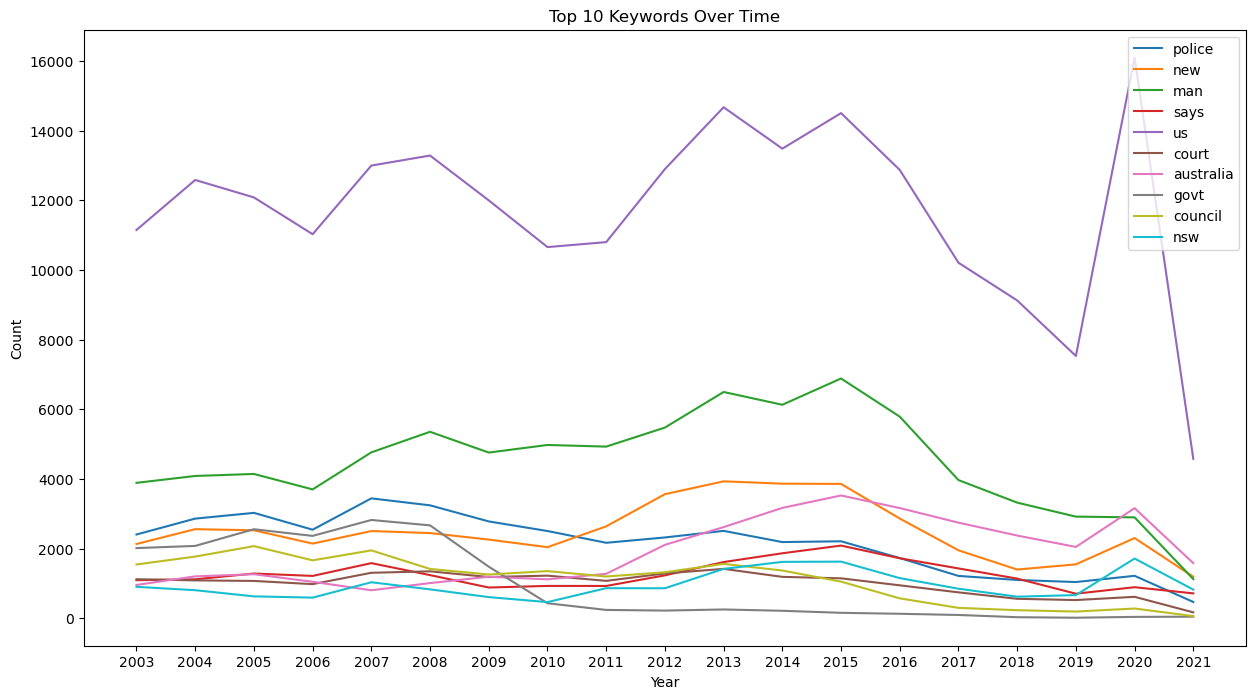

In [25]:
import matplotlib.pyplot as plt

# Referring to Step 2, 'df_filtered_words_agg' is the DataFrame with filtered words and their counts
top_10_words = df_filtered_words_agg['Word'].head(10).tolist()

# Escape any special regex characters in the words
escaped_words = [re.escape(word) for word in top_10_words]

# Create a DataFUnzippingame with word occurrences over the years
word_occurrences = []
for word in escaped_words:
    df_temp = abcnews_df[abcnews_df['headline_text'].str.contains(word, case=False, na=False)]
    yearly_word_counts = df_temp.groupby('year').size().reset_index(name='Count')
    yearly_word_counts['Word'] = word
    word_occurrences.append(yearly_word_counts)

word_occurrences_df = pd.concat(word_occurrences)

# Pivoting the data for plotting
pivot_data = word_occurrences_df.pivot(index='year', columns='Word', values='Count').fillna(0)

# Plotting
plt.figure(figsize=(15, 8))
for word in top_10_words:
    if word in pivot_data.columns:
        plt.plot(pivot_data.index, pivot_data[word], label=word)

plt.title('Top 10 Keywords Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

The above vizualization doesn't help much, as we can notice. 

The fact that mostly word occurencies declined after 2015, possibly means either due editorial changes in the newspaper or just a public view trend change, or maybe both sinergically feeding each other.

The only finding that we can have is that the same group of words have been keeping the same level of occurrencies in this newspaper over the years, with a sudden decline 2015 onwards, peaking on 2020 and then a steep decrease in occurencies happens in 2020 and 2021, possibly due the COVID-19 pandemics. 

Let's have a look at this two years, just to check what words occured the most over the headlines in this period. 

In [27]:
# Filtering the dataset by a range of years
def filter_by_year_range(df, start_year, end_year):
    return df[(df['year'] >= str(start_year)) & (df['year'] <= str(end_year))]

# Year range
start_year = 2020
end_year = 2021

# Filter the dataset for the specified year range
filtered_df = filter_by_year_range(abcnews_df, start_year, end_year)

In [28]:
# Aggregating the word counts for the filtered data
def aggregate_word_counts(filtered_df):
    all_words_list = [word for headline in filtered_df['headline_text'] for word in re.findall(r'\w+', str(headline))]
    filtered_words_list = [word for word in all_words_list if word.lower() not in stop_words]
    df_filtered_words_agg = pd.DataFrame(filtered_words_list, columns=['Word']).groupby('Word').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
    return df_filtered_words_agg

# Aggregating word counts for the filtered data
agg_filtered_words = aggregate_word_counts(filtered_df)
print(agg_filtered_words.head())


              Word  Count
6666   coronavirus   8945
6821         covid   4596
202             19   2737
2475     australia   2606
18508          nsw   2431


Then we can see that the output matches to our previous impressions. 

In [30]:
# Assuming filter_by_year_range and aggregate_word_counts are defined elsewhere
def plot_top_words(df, top_n=10, start_year=2020, end_year=2021):
    filtered_df = filter_by_year_range(df, start_year, end_year)
    agg_filtered_words = aggregate_word_counts(filtered_df)
    
    top_words = agg_filtered_words['Word'].head(top_n).tolist()
    escaped_words = [re.escape(word) for word in top_words]
    
    word_occurrences = []
    for word in escaped_words:
        df_temp = filtered_df[filtered_df['headline_text'].str.contains(word, case=False, na=False)]
        yearly_word_counts = df_temp.groupby('year').size().reset_index(name='Count')
        yearly_word_counts['Word'] = word
        word_occurrences.append(yearly_word_counts)
    
    word_occurrences_df = pd.concat(word_occurrences)
    pivot_data = word_occurrences_df.pivot(index='year', columns='Word', values='Count').fillna(0)
    
    plt.figure(figsize=(15, 8))
    for word in top_words:
        if word in pivot_data.columns:
            plt.plot(pivot_data.index, pivot_data[word], label=word)
    
    plt.title(f'Top {top_n} Keywords Over Time ({start_year} to {end_year})')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(loc='upper right')
    plt.show()

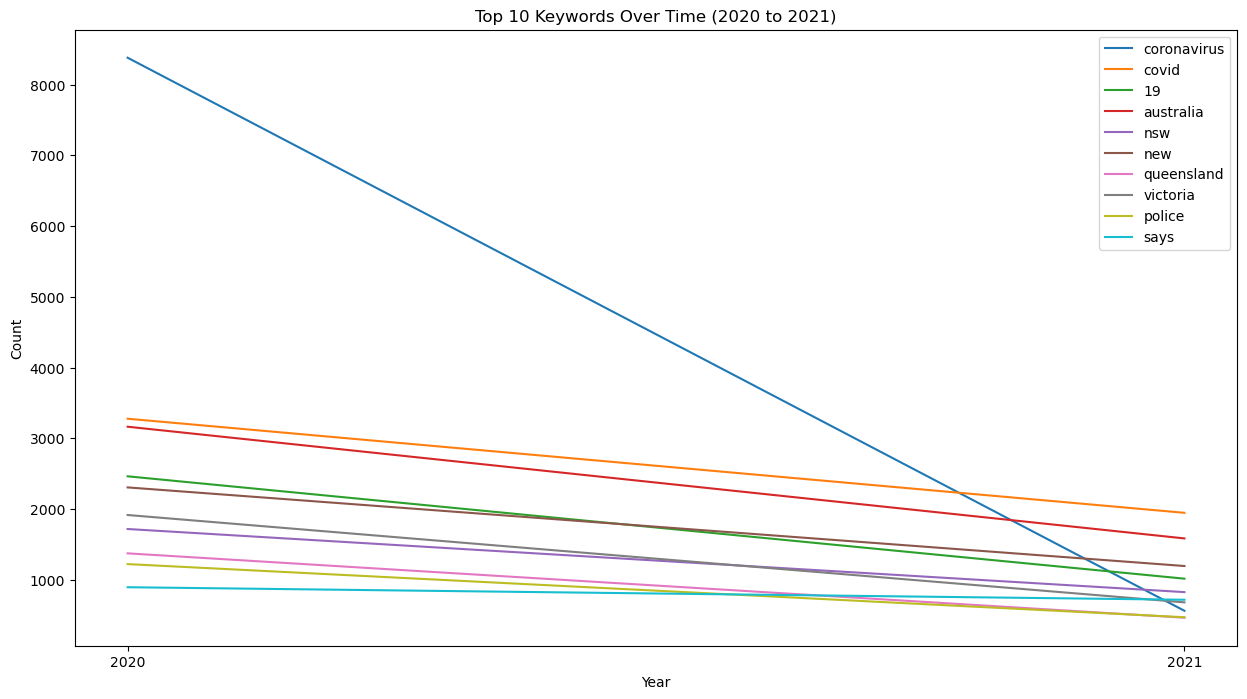

In [32]:
plot_top_words(abcnews_df, top_n=10, start_year=2020, end_year=2021) 

It was good to see that our feeling about the pandemics was right. 

Regardless,it seems that producing an analysis out of only one word don't give us much for a good insight. 

Coming back to our work, as we can't have any significant findings after going throughout the data analysis process, the best practice tells us to repeat the process again. 

## STEP 4: Preprocessing the data again

As a suggestion, a new approach could include checking the occurence of three-words groups within 5 years, excluding the pandemic years, so we can have a better idea what the trend topics was like. 

### Step 4.1: Changing the dataframe for investiganting other time periods.

First, a trial on 5-year period dataframe period. It'd interesting to exclude pandemic years, v.g. 2020-2021. We'll try 2014-2019.

In [79]:
# A function to filter the dataset by a range of years
def filter_by_year_range(df, start_year, end_year):
    return df[(df['year'] >= str(start_year)) & (df['year'] <= str(end_year))]

# Cutting to 2014 to 2019
filtered_df = filter_by_year_range(abcnews_df, 2014, 2019)

filtered_df

,publish_date,headline_text,year
843950,20140101,abbott wants conversation on indigenous refere...,2014
843951,20140101,anderson smashes odi century record,2014
843952,20140101,anelka quenelle salute sparks furore in israel,2014
843953,20140101,another fire in wingfield dump,2014
843954,20140101,asylum seeker boat intercepted north of darwin,2014
...,...,...,...
1186013,20191231,vision of flames approaching corryong in victoria,2019
1186014,20191231,wa police and government backflip on drug amne...,2019
1186015,20191231,we have fears for their safety: victorian premier,2019
1186016,20191231,when do the 20s start,2019


### Step 4.2 - Grouping rows trios

This time, let's use trios of close words, counting the trios in the same rows that repeated the most. 

In [42]:
import itertools
from collections import Counter

# Function to count trios of words per headline and aggregate
def count_word_trios_per_headline(df):
    all_trios = []
    for headline in df['headline_text']:
        words = re.findall(r'\w+', str(headline).lower())
        filtered_words = [word for word in words if word not in stop_words]
        # Only consider trios if there are at least 3 filtered words
        if len(filtered_words) >= 3:
            trios = [' '.join(filtered_words[i:i+3]) for i in range(len(filtered_words) - 2)]
            all_trios.extend(trios)
    
    trio_counts = Counter(all_trios)
    trio_df = pd.DataFrame(trio_counts.items(), columns=['Trio', 'Count']).sort_values(by='Count', ascending=False)
    trio_df = trio_df.reset_index(drop=True)  # Reset the index and drop the old one
    return trio_df

# Example usage
trio_df = count_word_trios_per_headline(filtered_df)
print(trio_df.head(10))  # Print top 10 trios


                     Trio  Count
0     national rural news    814
1        tas country hour    556
2        nsw country hour    463
3  live streaming updates    405
4            one plus one    316
5         wa country hour    302
6     finance alan kohler    282
7        vic country hour    258
8      great barrier reef    245
9         sa country hour    213


There it is: the most addressed topic was rural and country. A further investigation could confirm that rural and country could be close related. Not the topic for this investigation at the moment.

## STEP 5 - Visualization

Now we can plot the results.

### Step 5.1 - Bar Chart

 What about a bar chart this time?

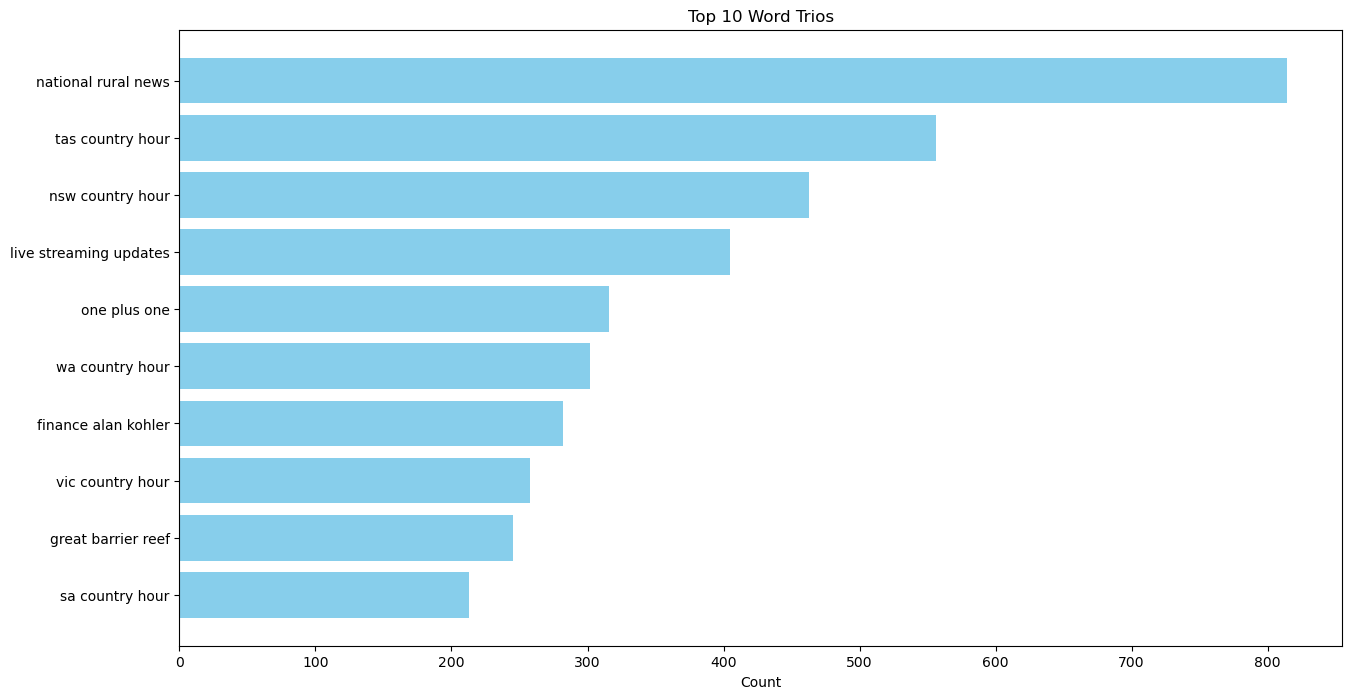

In [44]:

# Function to plot top N trios as a bar chart
def plot_top_trios_bar(trio_df, top_n=10):
    top_trios = trio_df.head(top_n)
    plt.figure(figsize=(15, 8))
    plt.barh(top_trios['Trio'], top_trios['Count'], color='skyblue')
    plt.xlabel('Count')
    plt.title(f'Top {top_n} Word Trios')
    plt.gca().invert_yaxis()
    plt.show()

# Example usage
plot_top_trios_bar(trio_df, top_n=10)


##### That doesn't tell me much. Better to try other vizualization. 

### Step 5.2 - Line chart.

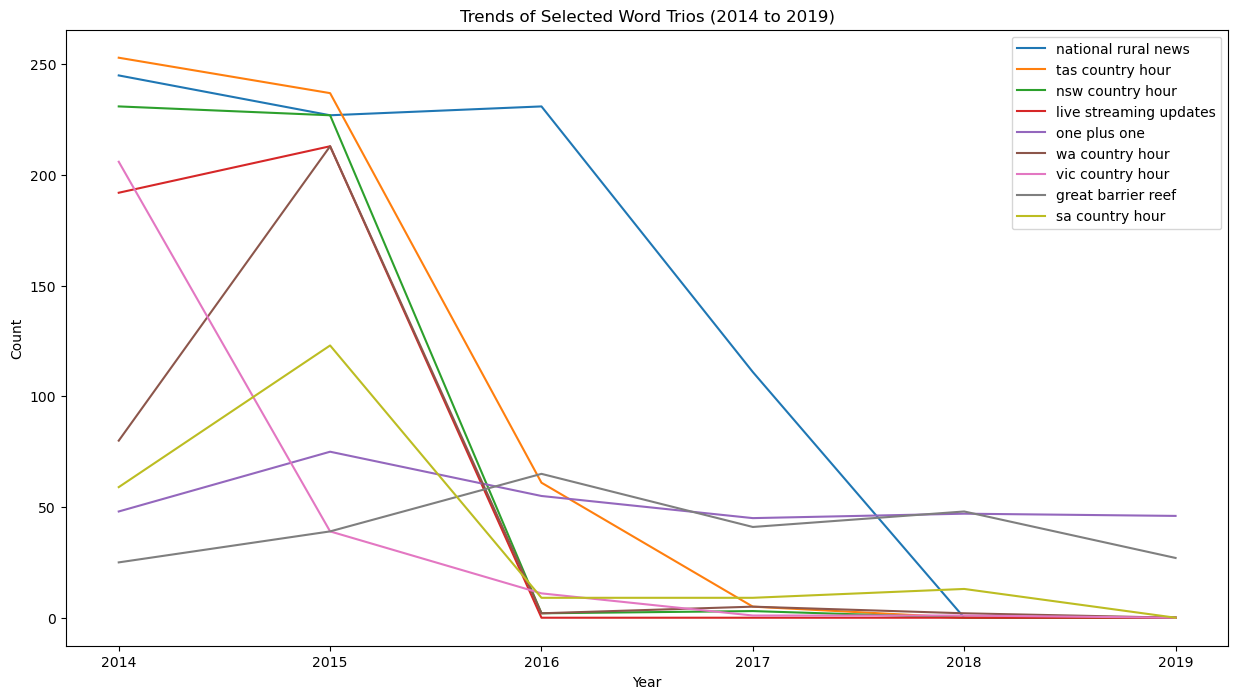

In [112]:
# Function to plot trends of selected word trios over a time range as a line chart
def plot_trio_trends_line(df, trios, start_year, end_year):
    filtered_df = filter_by_year_range(df, start_year, end_year)

    word_occurrences = []
    for trio in trios:
        # Create a regex pattern to match trios exactly
        pattern = r'\b' + re.escape(trio) + r'\b'
        df_temp = filtered_df[filtered_df['headline_text'].str.contains(pattern, case=False, na=False)]
        if not df_temp.empty:
            yearly_word_counts = df_temp.groupby('year').size().reset_index(name='Count')
            yearly_word_counts['Trio'] = trio
            word_occurrences.append(yearly_word_counts)

    if word_occurrences:
        word_occurrences_df = pd.concat(word_occurrences, ignore_index=True)
        pivot_data = word_occurrences_df.pivot(index='year', columns='Trio', values='Count').fillna(0)

        plt.figure(figsize=(15, 8))
        for trio in trios:
            if trio in pivot_data.columns:
                plt.plot(pivot_data.index, pivot_data[trio], label=trio)

        plt.title(f'Trends of Selected Word Trios ({start_year} to {end_year})')
        plt.xlabel('Year')
        plt.ylabel('Count')
        plt.legend(loc='upper right')
        plt.show()
    else:
        print("No data found for the selected trios in the specified time range.")

# Example usage
selected_trios = trio_df['Trio'].head(10).tolist()
plot_trio_trends_line(abcnews_df, selected_trios, start_year=2014, end_year=2019)


Over the historical record vizualization, only topics as Great Barrier Reef and Victoria News were consistent. "Country Hour", "Live Stream Updates" and "One Plus One" reffer to sections in the Newspaper, so it would often be seen in the headlines. However we can say that the audience from newspaper have strong interest in coutry or rural news, to be ahead of the moment news and also that interview with celebrities is a hot topic as well.
In a guess, we could say that is because they've changed the words, but the subject still remain. A deeper dive into the data, slicing it again in smaller topics or maybe increasing the word groups from 3 to 5. 
If we exclude from the analysis these newspaper section related words, maybe we could have a better insight about the trend topics mentioned in the dataset, which could be done though a new analysis process. 
However, for now, the report is finished.

For a final act, we could see a beautiful wordcloud. 

### Step 5.3 - Wordcloud

In [45]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


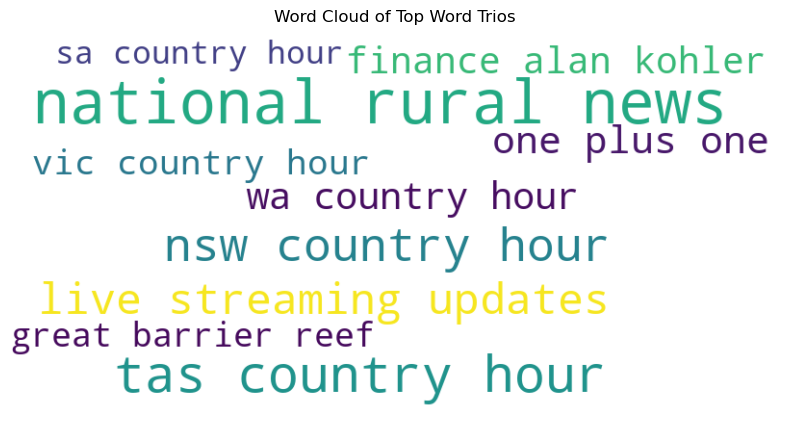

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to plot top N trios as a word cloud
def plot_top_trios_wordcloud(trio_df, top_n=10):
    top_trios = trio_df.head(top_n)
    trios_dict = dict(zip(top_trios['Trio'], top_trios['Count']))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(trios_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Top Word Trios')
    plt.show()

# Example usage
plot_top_trios_wordcloud(trio_df, top_n=10)
